## IMPACT OF TECHNOLOGY ANALYSIS
 
In this analysis we want to see how the technology sector has performed over the years in comparison to the Nifty50 and what is its contribution in the growth of Nifty50 and we will also look at some famous tech stocks. In this analysis we will try to find the answer to the follwing questions:
- 1. How has technology outperformed Nifty50?
- 2. What is the impact of IT Major stocks?


### 1. How has technology outperformed Nifty50?

For this analysis we need to gather data of Nifty IT index to compare it to Nifty50. For this we will take into consideration Nifty IT index which is the Technology sector index  so we will compare it with Nifty50 from 2003. Nifty IT is chosen because it is an index that has all major big technology companies, which would be perfect for our comparison.

In [1]:
import pandas as pd
import yfinance as yf # need to import yahoo finance in order download stock data directly from yahoo finance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# first we need to fetch data from csv file.
it_df = pd.read_csv("Nifty IT Historical Data.csv")

In [3]:
it_df

,Date,Open,High,Low,Close
0,01-09-2003,"1,505.79","1,536.01","1,505.08","1,528.39"
1,02-09-2003,"1,531.19","1,560.11","1,518.72","1,554.43"
2,03-09-2003,"1,577.99","1,590.18","1,517.18","1,527.53"
3,04-09-2003,"1,534.02","1,646.75","1,534.02","1,635.83"
4,05-09-2003,"1,643.62","1,677.81","1,637.12","1,671.26"
...,...,...,...,...,...
5307,17-01-2025,"42,469.00","42,495.05","41,962.65","42,032.20"
5308,20-01-2025,"42,377.35","42,478.50","41,709.55","42,192.80"
5309,21-01-2025,"42,288.55","42,536.70","41,639.00","41,697.95"
5310,22-01-2025,"41,755.20","42,635.35","41,750.20","42,590.70"


 Why we ned to change data into numerical ?

financial data include commas (e.g., "1,234.56" instead of "1234.56").
These commas prevent the values from being properly recognized as numeric data.
Removing commas ensures that these columns can be converted to numerical types (float or int) for analysis.

In [4]:
# Remove commas or special characters from the relevant columns and converted to numerical types
it_df['Open'] = it_df['Open'].replace({',': ''}, regex=True)
it_df['High'] = it_df['High'].replace({',': ''}, regex=True)
it_df['Low'] = it_df['Low'].replace({',': ''}, regex=True)
it_df['Close'] = it_df['Close'].replace({',': ''}, regex=True)



In [5]:
# change datatypes 

it_df = it_df.astype({
    'Open': 'float64',
    'High': 'float64',
    'Low': 'float64',
    'Close': 'float64',
 
})

it_df['Date'] = pd.to_datetime(it_df['Date'], format='%d-%m-%Y', errors='coerce')


print(it_df.dtypes)


Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object


In [6]:
it_df

,Date,Open,High,Low,Close
0,2003-09-01,1505.79,1536.01,1505.08,1528.39
1,2003-09-02,1531.19,1560.11,1518.72,1554.43
2,2003-09-03,1577.99,1590.18,1517.18,1527.53
3,2003-09-04,1534.02,1646.75,1534.02,1635.83
4,2003-09-05,1643.62,1677.81,1637.12,1671.26
...,...,...,...,...,...
5307,2025-01-17,42469.00,42495.05,41962.65,42032.20
5308,2025-01-20,42377.35,42478.50,41709.55,42192.80
5309,2025-01-21,42288.55,42536.70,41639.00,41697.95
5310,2025-01-22,41755.20,42635.35,41750.20,42590.70


In [7]:
# Nifty 50 data from 2003-09-01 for comparison with Nifty IT index.
df = pd.read_csv('nifty_data.csv')

# change date into datetime format 
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Filter data from 2003-09-01 to 2025-01-23
start_date = '2003-09-01'
end_date = '2025-01-23'
nifty_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Reset the index 
nifty_df.reset_index(drop=True, inplace=True)


nifty_df

,Date,Open,High,Low,Close
0,2003-09-01,1375.95000,1356.70000,1379.40000,1356.65000
1,2003-09-02,1385.45000,1375.95000,1388.95000,1366.90000
2,2003-09-03,1359.35000,1387.20000,1394.95000,1353.60000
3,2003-09-04,1372.70000,1358.90000,1382.60000,1355.80000
4,2003-09-05,1398.40000,1373.00000,1400.90000,1372.75000
...,...,...,...,...,...
5268,2025-01-17,23277.09961,23292.09961,23100.34961,23203.19922
5269,2025-01-20,23290.40039,23391.09961,23170.65039,23344.75000
5270,2025-01-21,23421.65039,23426.30078,22976.84961,23024.65039
5271,2025-01-22,23099.15039,23169.55078,22981.30078,23155.34961


In order to comparison, normalization is required becasue it will help in starting both index from the same baseline which will give us accurate results for comparison.

In [8]:
# Remove commas or special characters from the relevant columns and converted to numerical types
nifty_df['Open'] = nifty_df['Open'].replace({',': ''}, regex=True)
nifty_df['High'] = nifty_df['High'].replace({',': ''}, regex=True)
nifty_df['Low'] = nifty_df['Low'].replace({',': ''}, regex=True)
nifty_df['Close'] = nifty_df['Close'].replace({',': ''}, regex=True)

C:\Users\nakum\AppData\Local\Temp\ipykernel_516\684950501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_df['Open'] = nifty_df['Open'].replace({',': ''}, regex=True)
C:\Users\nakum\AppData\Local\Temp\ipykernel_516\684950501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_df['High'] = nifty_df['High'].replace({',': ''}, regex=True)
C:\Users\nakum\AppData\Local\Temp\ipykernel_516\684950501.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [9]:
# Change datatypes of all of 

nifty_df = nifty_df.astype({
    'Open': 'float64',
    'High': 'float64',
    'Low': 'float64',
    'Close': 'float64',
 
})

nifty_df['Date'] = pd.to_datetime(it_df['Date'], format='%d-%m-%Y', errors='coerce')

print(nifty_df.dtypes)


Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object


In [10]:
nifty_df

,Date,Open,High,Low,Close
0,2003-09-01,1375.95000,1356.70000,1379.40000,1356.65000
1,2003-09-02,1385.45000,1375.95000,1388.95000,1366.90000
2,2003-09-03,1359.35000,1387.20000,1394.95000,1353.60000
3,2003-09-04,1372.70000,1358.90000,1382.60000,1355.80000
4,2003-09-05,1398.40000,1373.00000,1400.90000,1372.75000
...,...,...,...,...,...
5268,2024-11-22,23277.09961,23292.09961,23100.34961,23203.19922
5269,2024-11-25,23290.40039,23391.09961,23170.65039,23344.75000
5270,2024-11-26,23421.65039,23426.30078,22976.84961,23024.65039
5271,2024-11-27,23099.15039,23169.55078,22981.30078,23155.34961


In [11]:

# for normilization divide the closing value with the starting close value of the index as it helps to compare percentage change of the closing price of both index over time.
nifty_df['Normalized_Close'] = nifty_df['Close'] / nifty_df['Close'].iloc[0]
it_df['Normalized_Close'] = it_df['Close'] / it_df['Close'].iloc[0]

In [12]:
nifty_df

,Date,Open,High,Low,Close,Normalized_Close
0,2003-09-01,1375.95000,1356.70000,1379.40000,1356.65000,1.000000
1,2003-09-02,1385.45000,1375.95000,1388.95000,1366.90000,1.007555
2,2003-09-03,1359.35000,1387.20000,1394.95000,1353.60000,0.997752
3,2003-09-04,1372.70000,1358.90000,1382.60000,1355.80000,0.999373
4,2003-09-05,1398.40000,1373.00000,1400.90000,1372.75000,1.011867
...,...,...,...,...,...,...
5268,2024-11-22,23277.09961,23292.09961,23100.34961,23203.19922,17.103305
5269,2024-11-25,23290.40039,23391.09961,23170.65039,23344.75000,17.207644
5270,2024-11-26,23421.65039,23426.30078,22976.84961,23024.65039,16.971695
5271,2024-11-27,23099.15039,23169.55078,22981.30078,23155.34961,17.068035


In [13]:
it_df

,Date,Open,High,Low,Close,Normalized_Close
0,2003-09-01,1505.79,1536.01,1505.08,1528.39,1.000000
1,2003-09-02,1531.19,1560.11,1518.72,1554.43,1.017038
2,2003-09-03,1577.99,1590.18,1517.18,1527.53,0.999437
3,2003-09-04,1534.02,1646.75,1534.02,1635.83,1.070296
4,2003-09-05,1643.62,1677.81,1637.12,1671.26,1.093477
...,...,...,...,...,...,...
5307,2025-01-17,42469.00,42495.05,41962.65,42032.20,27.500965
5308,2025-01-20,42377.35,42478.50,41709.55,42192.80,27.606043
5309,2025-01-21,42288.55,42536.70,41639.00,41697.95,27.282271
5310,2025-01-22,41755.20,42635.35,41750.20,42590.70,27.866382


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

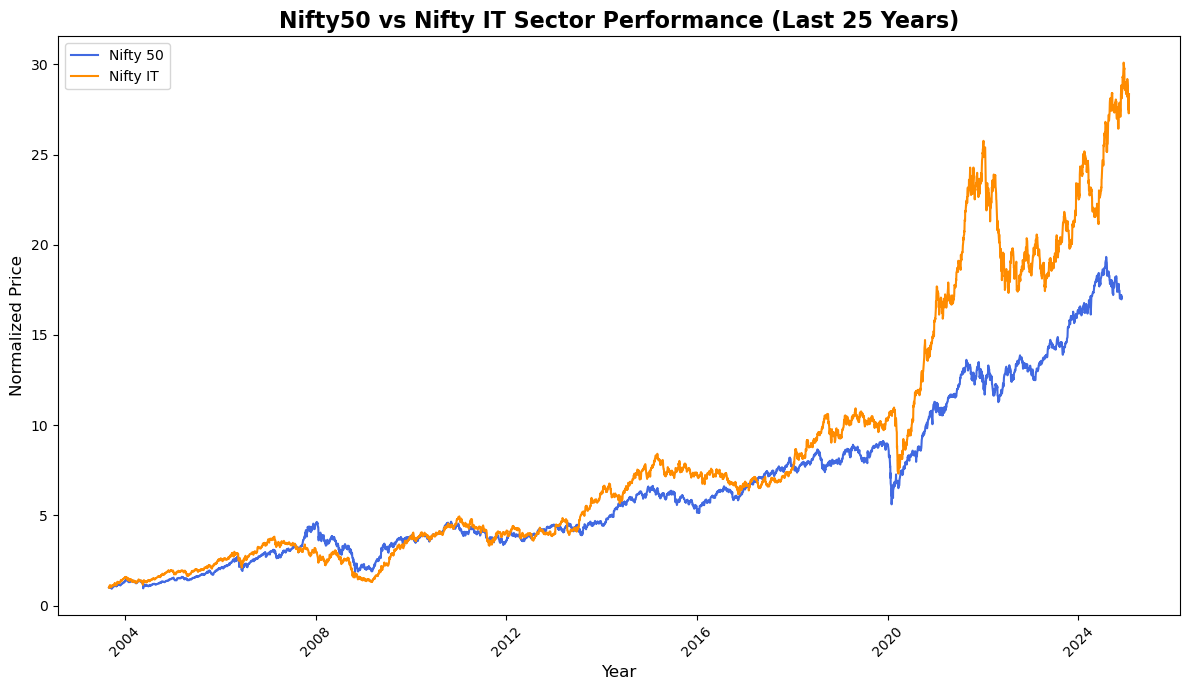

In [15]:
# now we can graph the comparison
plt.figure(figsize=(12, 7))
sns.lineplot(data=nifty_df, x='Date', y='Normalized_Close', label='Nifty 50', color='royalblue')
sns.lineplot(data=it_df, x='Date', y='Normalized_Close', label='Nifty IT', color='darkorange')

plt.title('Nifty50 vs Nifty IT Sector Performance (Last 25 Years)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Normalized Price', fontsize=12)

plt.legend(fontsize=10)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

From the graph we can clerly see that technology sector has dramatically outperformed Nifty50 especially since 2017-2018 which would be the start of the rise of Digital Transformations in Country.

### 2. What is the impact of IT big stocks?

IT stocks- TCS, infosys, Hcltech, Wipro, Techm are the most influencial and successful stocks over the recent years. These companies are known for their innovation, cultural impact, market dominance and financial performace that is why we need to look at their impact.

In [15]:
import yfinance as yf # for fetch data from yahoo finance.

# created a fn to fetch data
def fetch_data(ticker, start_date, end_date):
    return yf.download(ticker, start=start_date, end=end_date)['Close']

# Set date range(Available Max data on yfinance )
start_date = '2007-10-01'
end_date = '2025-01-23'

# list of tech companies and their tickers
tech_companies = {
'TCS' : 'TCS.NS',
'Infosys' : 'INFY.NS',
'HCLTech' : 'HCLTECH.NS' ,
'Wipro' : 'WIPRO.NS',
'Tech Mahindra' : 'TECHM.NS'
}

# Download data
tiwht = pd.DataFrame()
for company, ticker in tech_companies.items():
    tiwht[company] = fetch_data(ticker, start_date, end_date)
tiwht['NIFTY50'] = fetch_data('^NSEI', start_date, end_date)    
  
# Calculate cumulative returns- because there are different satrt date for different companies so this is prefered for normalization
cumulative_returns = (1 + tiwht.pct_change()).cumprod()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\nakum\AppData\Local\Temp\ipykernel_74004\4023533190.py:27: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  cumulative_returns = (1 + tiwht.pct_change()).cumprod()


In [16]:
tiwht

,TCS,Infosys,HCLTech,Wipro,Tech Mahindra,NIFTY50
Date,,,,,,
2007-10-01,196.171875,166.267654,48.682564,40.464878,241.526169,5068.950195
2007-10-03,203.243591,174.662445,50.079369,41.903522,244.566681,5210.799805
2007-10-04,203.262466,174.431183,50.054726,41.159698,241.776428,5208.649902
2007-10-05,202.038284,173.034973,50.293015,40.990448,241.841324,5185.850098
2007-10-08,203.083511,174.845673,50.687374,41.823345,240.969940,5085.100098
...,...,...,...,...,...,...
2025-01-16,4140.299805,1928.449951,1786.250000,288.049988,1687.650024,23311.800781
2025-01-17,4124.299805,1815.449951,1788.900024,281.950012,1660.300049,23203.199219
2025-01-20,4077.800049,1813.300049,1796.199951,300.250000,1674.599976,23344.750000


In [26]:
cumulative_returns

,TCS,Infosys,HCLTech,Wipro,Tech Mahindra,NIFTY50
Date,,,,,,
2007-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-03,1.036049,1.050490,1.028692,1.035553,1.012589,1.027984
2007-10-04,1.036145,1.049099,1.028186,1.017171,1.001036,1.027560
2007-10-05,1.029904,1.040701,1.033081,1.012988,1.001305,1.023062
2007-10-08,1.035233,1.051592,1.041181,1.033572,0.997697,1.003186
...,...,...,...,...,...,...
2025-01-16,21.105471,11.598467,36.691782,7.118519,6.987442,4.598941
2025-01-17,21.023910,10.918840,36.746216,6.967771,6.874204,4.577516
2025-01-20,20.786874,10.905910,36.896166,7.420015,6.933410,4.605441


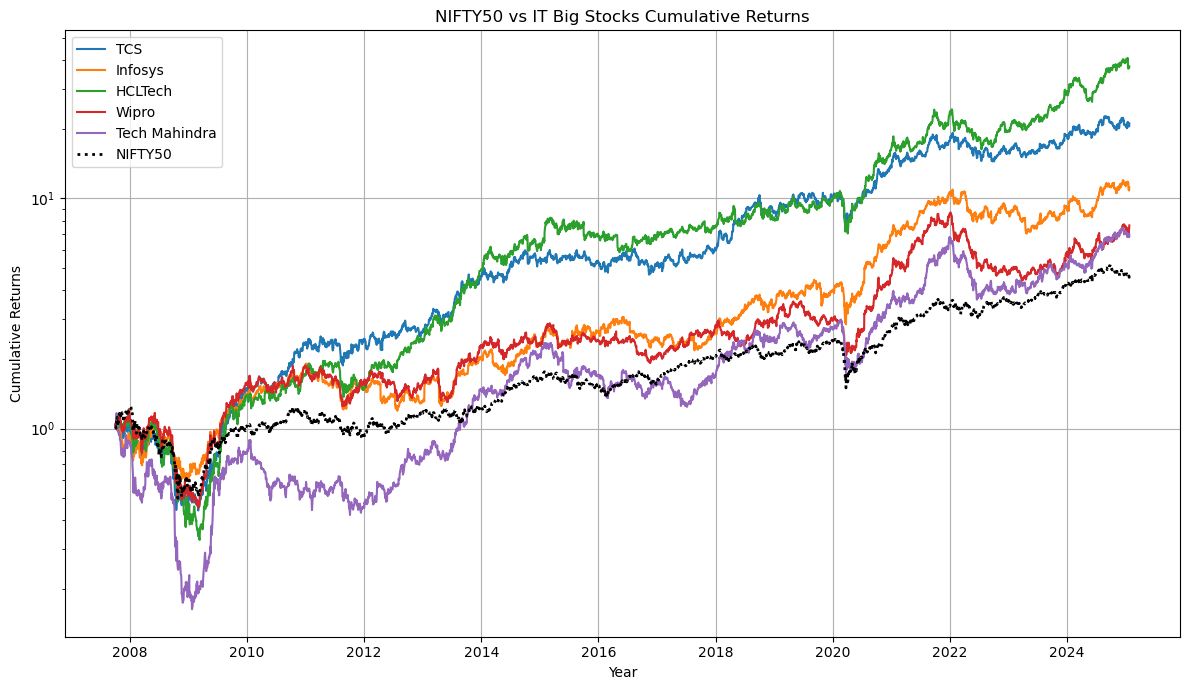

In [29]:
# Plotting
plt.figure(figsize=(12, 7))

for company in tech_companies:
    plt.plot(cumulative_returns[company], label=company)
plt.plot(cumulative_returns['NIFTY50'], label='NIFTY50', color = 'black', linestyle = ':', linewidth = 2 )

plt.title('NIFTY50 vs IT Big Stocks Cumulative Returns')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.yscale('log')  # Use log scale for better visualization of returns
plt.grid(True)
plt.tight_layout()
plt.show()



The IT sector big 5 stocks outperformed the nifty50 as one can see for TCS, HCLTECH overroll while others have outperformed during different time intervals. however there is volititlity during covid times which can be clearly seen which will be discussed in our next analysis.
